In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
# Initial deflection f(x)
def f(x):
    return np.piecewise(x,
                       [x <= 0.5, x > 0.5],
                       [lambda x: 0.2 * x, lambda x: -0.2*x + 0.2])

# Fourier coefficients B_n
def B(n):
    return (4.0/5.0 * 1.0/(n*np.pi)**2) * np.sin(n*np.pi/2.0)

# Solution u(x, t) as a sum of Fourier terms
def u(x, t, n_terms=20):
    u_xt = np.zeros_like(x)
    for n in range(1, n_terms + 1):
        u_xt += B(n) * np.sin(n*np.pi*x) * np.cos(n*np.pi*t)
    return u_xt

In [3]:
# Parameters
L = 1.0          # Length of the string
c = 1.0          # Wave speed (c² = 1)
k = 0.01         # Small parameter (not directly used here)
n_terms = 20     # Number of terms in the Fourier series
nx = 100         # Number of spatial points
nt = 100         # Number of time points
t_max = 2.0      # Maximum time

# Spatial grid
x = np.linspace(0, L, nx)

# Time grid
t_vals = np.linspace(0, t_max, nt)

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, L)
ax.set_ylim(-0.15, 0.15)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Displacement (u)')
ax.set_title('Vibrating String: Solution u(x, t)')
ax.grid(True)

# Initialize the plot with the initial deflection
line, = ax.plot(x, f(x), 'r-', lw=2, label='Initial deflection')
line_u, = ax.plot(x, u(x, 0), 'b-', lw=2, label='Solution u(x, t)')
ax.legend()

# Animation update function
def update(frame):
    t = t_vals[frame]
    line_u.set_ydata(u(x, t))
    ax.set_title(f'Vibrating String at t = {t:.2f}')
    return line_u,

# Create the animation
ani = FuncAnimation(fig, update, frames=nt, interval=50, blit=True)

# Display the animation (in Jupyter Notebook)
plt.close()
HTML(ani.to_jshtml())

# To save the animation (uncomment if needed)
# ani.save('vibrating_string.mp4', writer='ffmpeg', fps=20)

In [5]:
t_vals[::15]

array([0.        , 0.3030303 , 0.60606061, 0.90909091, 1.21212121,
       1.51515152, 1.81818182])

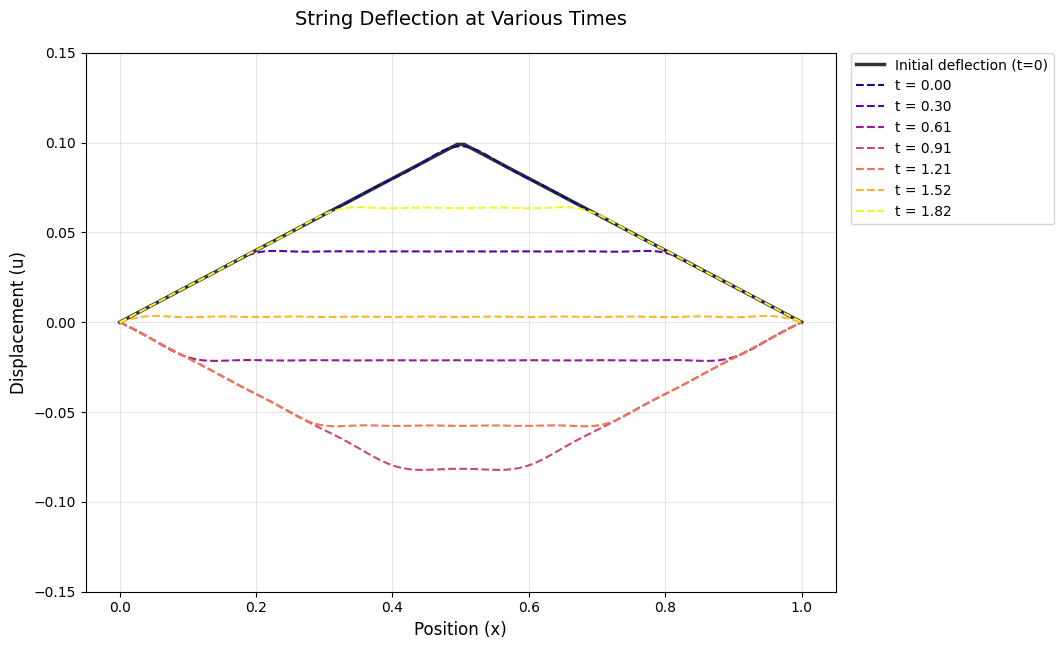

In [6]:
# Create figure with adjusted layout
plt.figure(figsize=(12, 7))

# Plot initial deflection
plt.plot(x, f(x), 'k-', lw=2.5, alpha=0.8, label='Initial deflection (t=0)')

# Create colormap for time evolution
n = 15
colors = plt.cm.plasma(np.linspace(0, 1, len(t_vals[::n])))

# Plot solutions at different times
for t, color in zip(t_vals[::n], colors):
    plt.plot(x, u(x, t), '--', lw=1.5, color=color, alpha=1.0, label=f't = {t:.2f}')

# Formatting
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Displacement (u)', fontsize=12)
plt.ylim(-0.15, 0.15)
plt.title('String Deflection at Various Times', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)

# Adjust legend and layout
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.subplots_adjust(right=0.75)  # Make space for legend

plt.show()